In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole
%load_ext snakeviz
import os
import sys
import collections
import itertools
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from tqdm import tqdm_notebook as tqdm

sys.path.append(os.path.join(os.path.abspath(os.path.pardir), 'src'))
import data_processing
import ripple_decoding
import ripple_detection
import analysis
import spectral

In [2]:
Animal = collections.namedtuple('Animal', {'directory', 'short_name'})
num_days = 8
days = range(1, num_days + 1)
animals = {'HPa': Animal(directory='HPa_direct', short_name='HPa'),
           'HPc': Animal(directory='HPc_direct', short_name='HPc')
           }

epoch_info = data_processing.make_epochs_dataframe(animals, days)
tetrode_info = data_processing.make_tetrode_dataframe(animals)
epoch_index = (epoch_info
    .loc[(['HPa', 'HPc'], [8]), :]
    .loc[epoch_info.environment == 'wtr1'].index)

print(epoch_index.tolist())

[('HPa', 8, 2), ('HPc', 8, 2)]


In [528]:
%%snakeviz
sampling_frequency = 1500

gamma_frequency_params = dict(
    sampling_frequency=sampling_frequency,
    time_window_duration=0.600,
    time_window_step=0.600,
    desired_frequencies=[20, 100],
    time_halfbandwidth_product=3,
    window_of_interest=(-2.100, 2.100)
)

low_frequency_params = dict(
    sampling_frequency=1500,
    time_window_duration=3.000,
    time_window_step=3.000,
    desired_frequencies=[3, 20],
    time_halfbandwidth_product=3,
    window_of_interest=(-7.500, 7.500)
)

coherence_type = {
    'gamma_coherence': gamma_frequency_params,
    'low_frequency_coherence': low_frequency_params
}

ripple_covariates = ['is_spike', 'session_time', 'ripple_trajectory', 'ripple_direction']


for epoch in tqdm(epoch_index, desc='epoch'):
    ripple_times = ripple_detection.get_epoch_ripples(
        epoch, animals, sampling_frequency=sampling_frequency)
    ripple_info = ripple_decoding.decode_ripple(
        epoch, animals, ripple_times)[0]
    analysis.save_ripple_info(epoch, ripple_info)
    for covariate in ripple_covariates:
        for coherence_name in coherence_type:
            analysis.coherence_by_ripple_type(
                epoch, animals, ripple_info, covariate, 
                coherence_name=coherence_name,
                multitaper_params=coherence_type[coherence_name])


Detecting ripples for Animal HPa, Day 8, Epoch #2...


Decoding ripples for Animal HPa, Day 8, Epoch #2:
	Fitting encoding model...
	Fitting state transition model...


/Users/edeno/anaconda3/envs/Jadhav-2016-Data-Analysis/lib/python3.5/site-packages/numpy/lib/function_base.py:804: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


	Setting initial conditions...
	Decoding ripples...

Computing gamma_coherence for each level of the covariate "is_spike"
for 190 pairs of electrodes:
	Level: isSpike (98 ripples)
	Level: noSpike (57 ripples)

Computing the difference in coherence between all levels:
	Level Difference: noSpike - isSpike

Saving Parameters...

Computing low_frequency_coherence for each level of the covariate "is_spike"
for 190 pairs of electrodes:
	Level: isSpike (98 ripples)
	Level: noSpike (57 ripples)

Computing the difference in coherence between all levels:
	Level Difference: noSpike - isSpike

Saving Parameters...

Computing gamma_coherence for each level of the covariate "session_time"
for 190 pairs of electrodes:
	Level: early (39 ripples)
	Level: late (79 ripples)
	Level: middle (37 ripples)

Computing the difference in coherence between all levels:
	Level Difference: early - middle
	Level Difference: late - middle
	Level Difference: late - early

Saving Parameters...

Computing low_frequency_c

/Users/edeno/anaconda3/envs/Jadhav-2016-Data-Analysis/lib/python3.5/site-packages/numpy/lib/function_base.py:804: RuntimeWarning: invalid value encountered in greater_equal
  not_smaller_than_edge = (sample[:, i] >= edges[i][-1])


	Setting initial conditions...
	Decoding ripples...

Computing gamma_coherence for each level of the covariate "is_spike"
for 231 pairs of electrodes:
	Level: isSpike (159 ripples)
	Level: noSpike (9 ripples)

Computing the difference in coherence between all levels:
	Level Difference: noSpike - isSpike

Saving Parameters...

Computing low_frequency_coherence for each level of the covariate "is_spike"
for 231 pairs of electrodes:
	Level: isSpike (159 ripples)
	Level: noSpike (9 ripples)

Computing the difference in coherence between all levels:
	Level Difference: noSpike - isSpike

Saving Parameters...

Computing gamma_coherence for each level of the covariate "session_time"
for 231 pairs of electrodes:
	Level: early (49 ripples)
	Level: late (76 ripples)
	Level: middle (43 ripples)

Computing the difference in coherence between all levels:
	Level Difference: early - middle
	Level Difference: late - middle
	Level Difference: late - early

Saving Parameters...

Computing low_frequency_c

## Ripple Coherence: Late vs. Early in Session Ripples

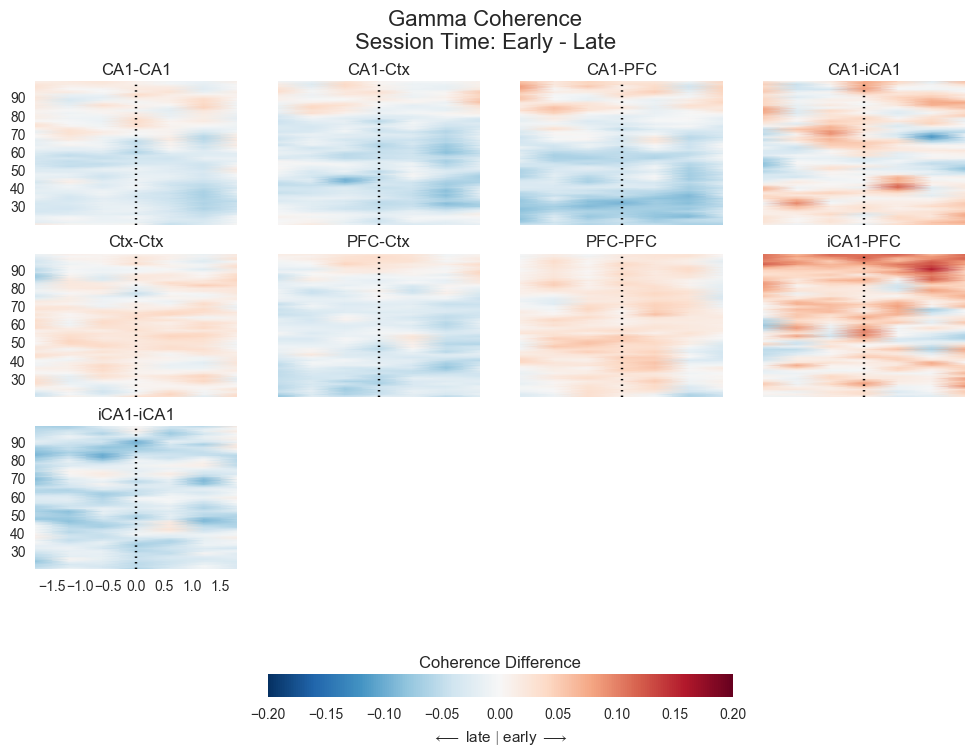

In [56]:
`


path = ('gamma_coherence', 'session_time', 'early_late')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

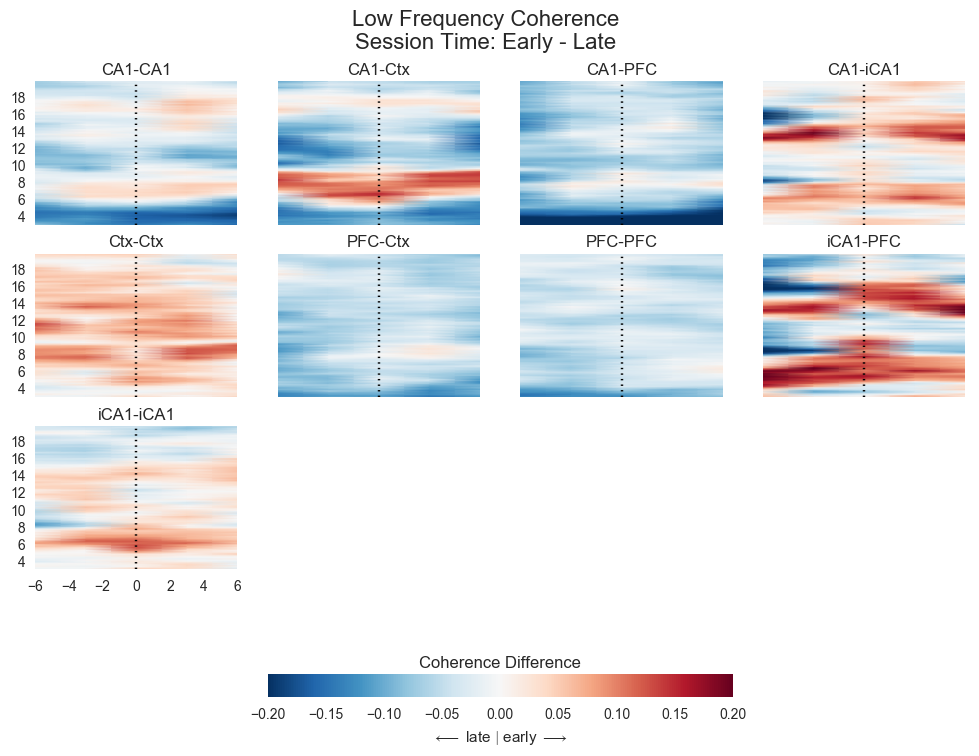

In [58]:
path = ('low_frequency_coherence', 'session_time', 'early_late')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(path[0])
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

## Coherence Difference: Spike vs. No Spike

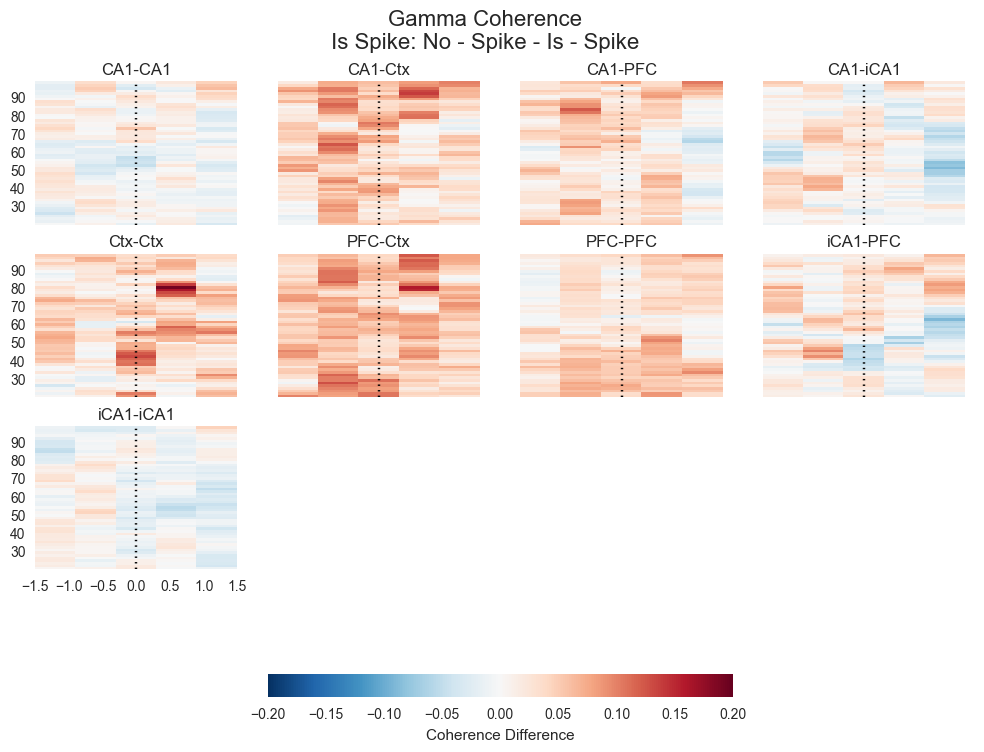

In [352]:
path = ('gamma_coherence', 'is_spike', 'no_spike_is_spike')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

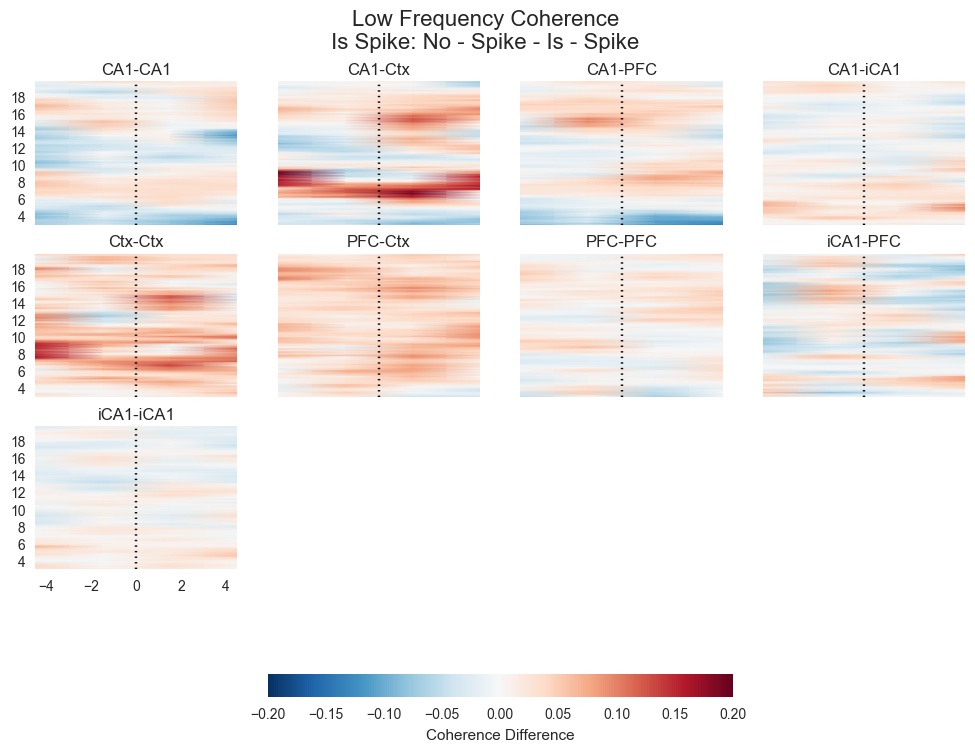

In [236]:
path = ('low_frequency_coherence', 'is_spike', 'no_spike_is_spike')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

## Coherence Difference: Forward vs. Reverse

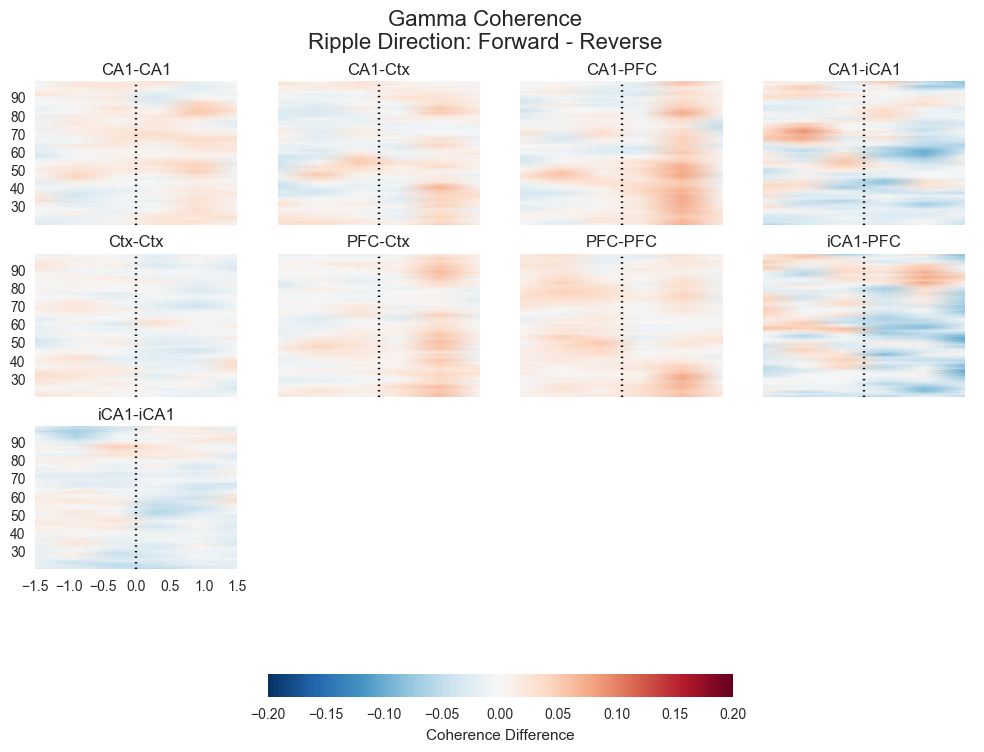

In [239]:
path = ('gamma_coherence', 'ripple_direction', 'forward_reverse')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

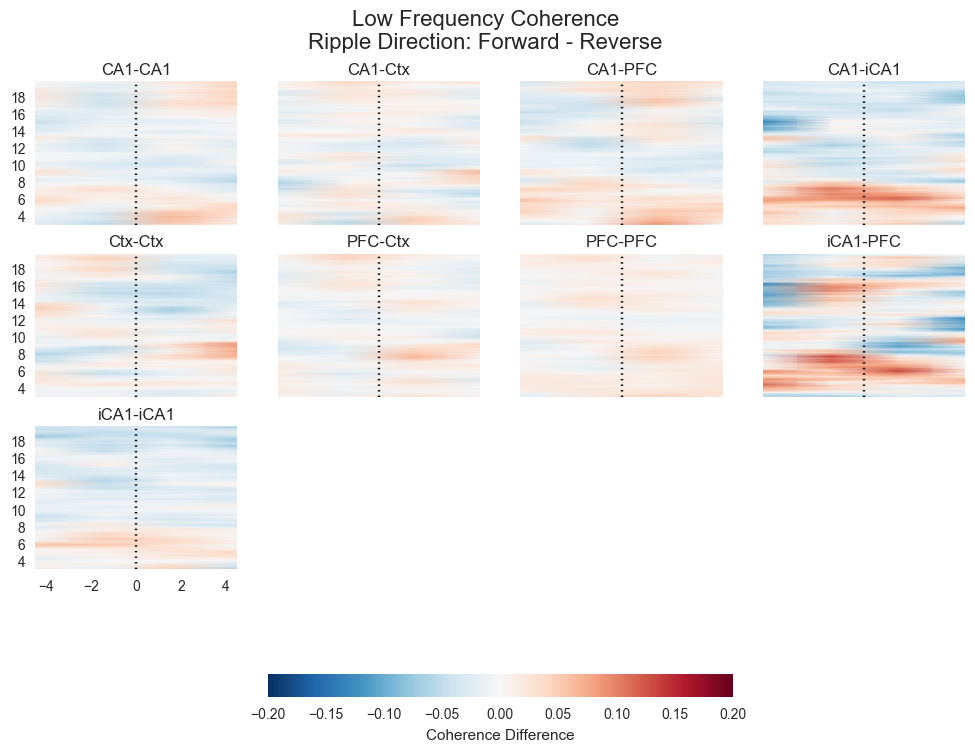

In [240]:
path = ('low_frequency_coherence', 'ripple_direction', 'forward_reverse')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

## Coherence Difference: Inbound vs. Outbound

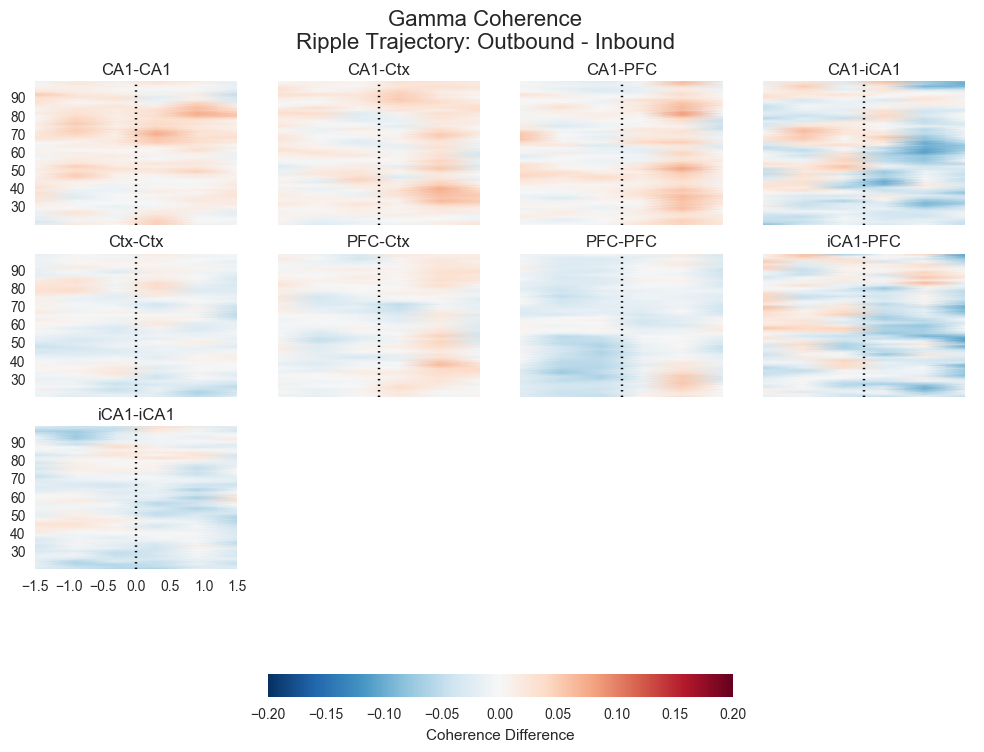

In [241]:
path = ('gamma_coherence', 'ripple_trajectory', 'outbound_inbound')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

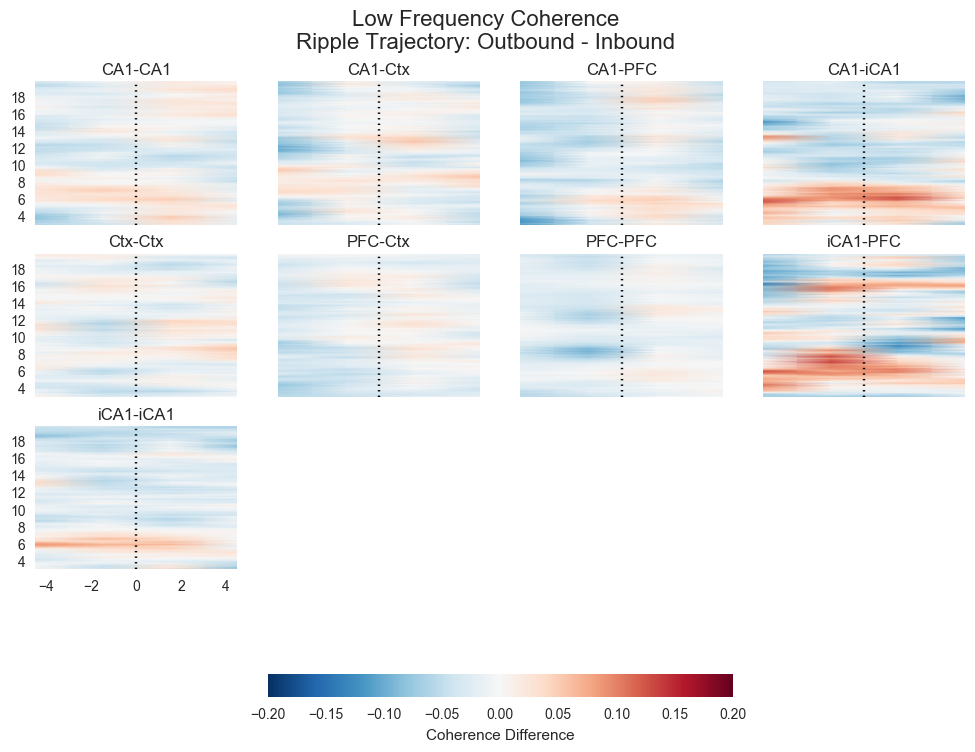

In [242]:
path = ('low_frequency_coherence', 'ripple_trajectory', 'outbound_inbound')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area(path, tetrode_pair_info, brain_area_pair_groups)

## Plot coherence difference and individual coherences

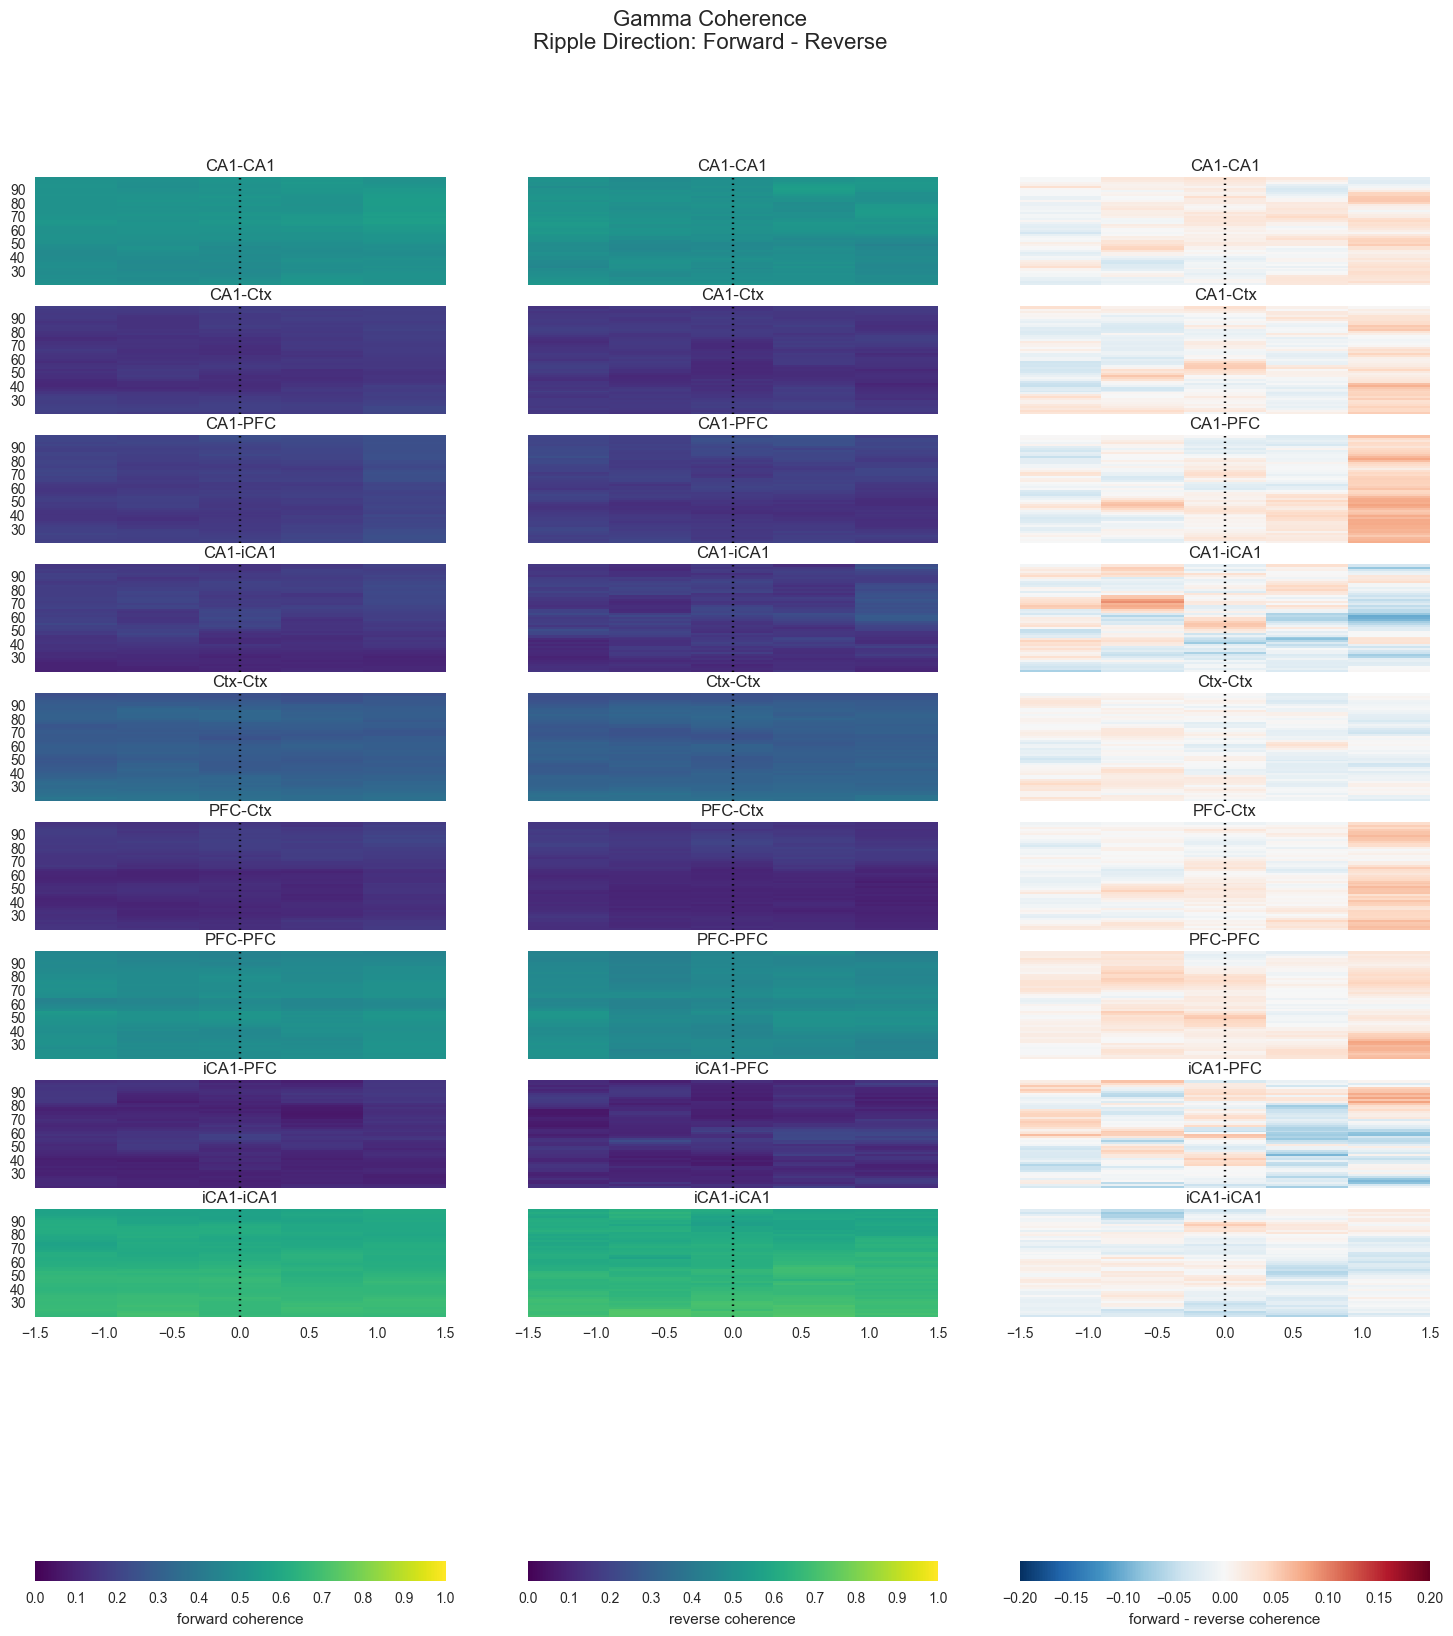

In [398]:
def plot_coherence_difference_by_area2(path, tetrode_pair_info, brain_area_pair_groups, figsize=(18, 21)):
    coherence_name, covariate, difference_level = path
    num_groups = len(brain_area_pair_groups)
    level2, level1 = difference_level.split('_')

    fig, axes = plt.subplots(num_groups, 3, figsize=figsize, sharex=True, sharey=True)
    
    # Level2
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_coherence = analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, level2).mean(axis=0)
        level2_mesh = spectral.plot_coherogram(group_coherence, axis_handle=axes[group_ind, 0],
                                        vmin=0, vmax=1)
        axes[group_ind, 0].set_title('-'.join(brain_area_pair))
        axes[group_ind, 0].axvline(0, color='black', linestyle=':')
        
    plt.colorbar(level2_mesh, ax=axes[:, 0].ravel().tolist(),
                 orientation='horizontal', label='{} coherence'.format(level2))
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title()) 
    
    # Level1
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_coherence = analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, level1).mean(axis=0)
        level1_mesh = spectral.plot_coherogram(group_coherence, axis_handle=axes[group_ind, 1],
                                        vmin=0, vmax=1)
        axes[group_ind, 1].set_title('-'.join(brain_area_pair))
        axes[group_ind, 1].axvline(0, color='black', linestyle=':')
        
    plt.colorbar(level1_mesh, ax=axes[:, 1].ravel().tolist(),
                 orientation='horizontal', label='{} coherence'.format(level1))
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title()) 
    
    ## Difference
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_coherence = analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, difference_level).mean(axis=0)
        mesh = spectral.plot_coherogram(group_coherence, axis_handle=axes[group_ind, 2],
                                        vmin=-0.2, vmax=0.2, cmap='RdBu_r')
        axes[group_ind, 2].set_title('-'.join(brain_area_pair))
        axes[group_ind, 2].axvline(0, color='black', linestyle=':')
        
    plt.colorbar(mesh, ax=axes[:, 2].ravel().tolist(),
                 orientation='horizontal', label='{} - {} coherence'.format(level2, level1))
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title())
    plt.suptitle(title, fontsize=16)
    
path = ('gamma_coherence', 'ripple_direction', 'forward_reverse')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_difference_by_area2(path, tetrode_pair_info, brain_area_pair_groups)

## Phaseograms

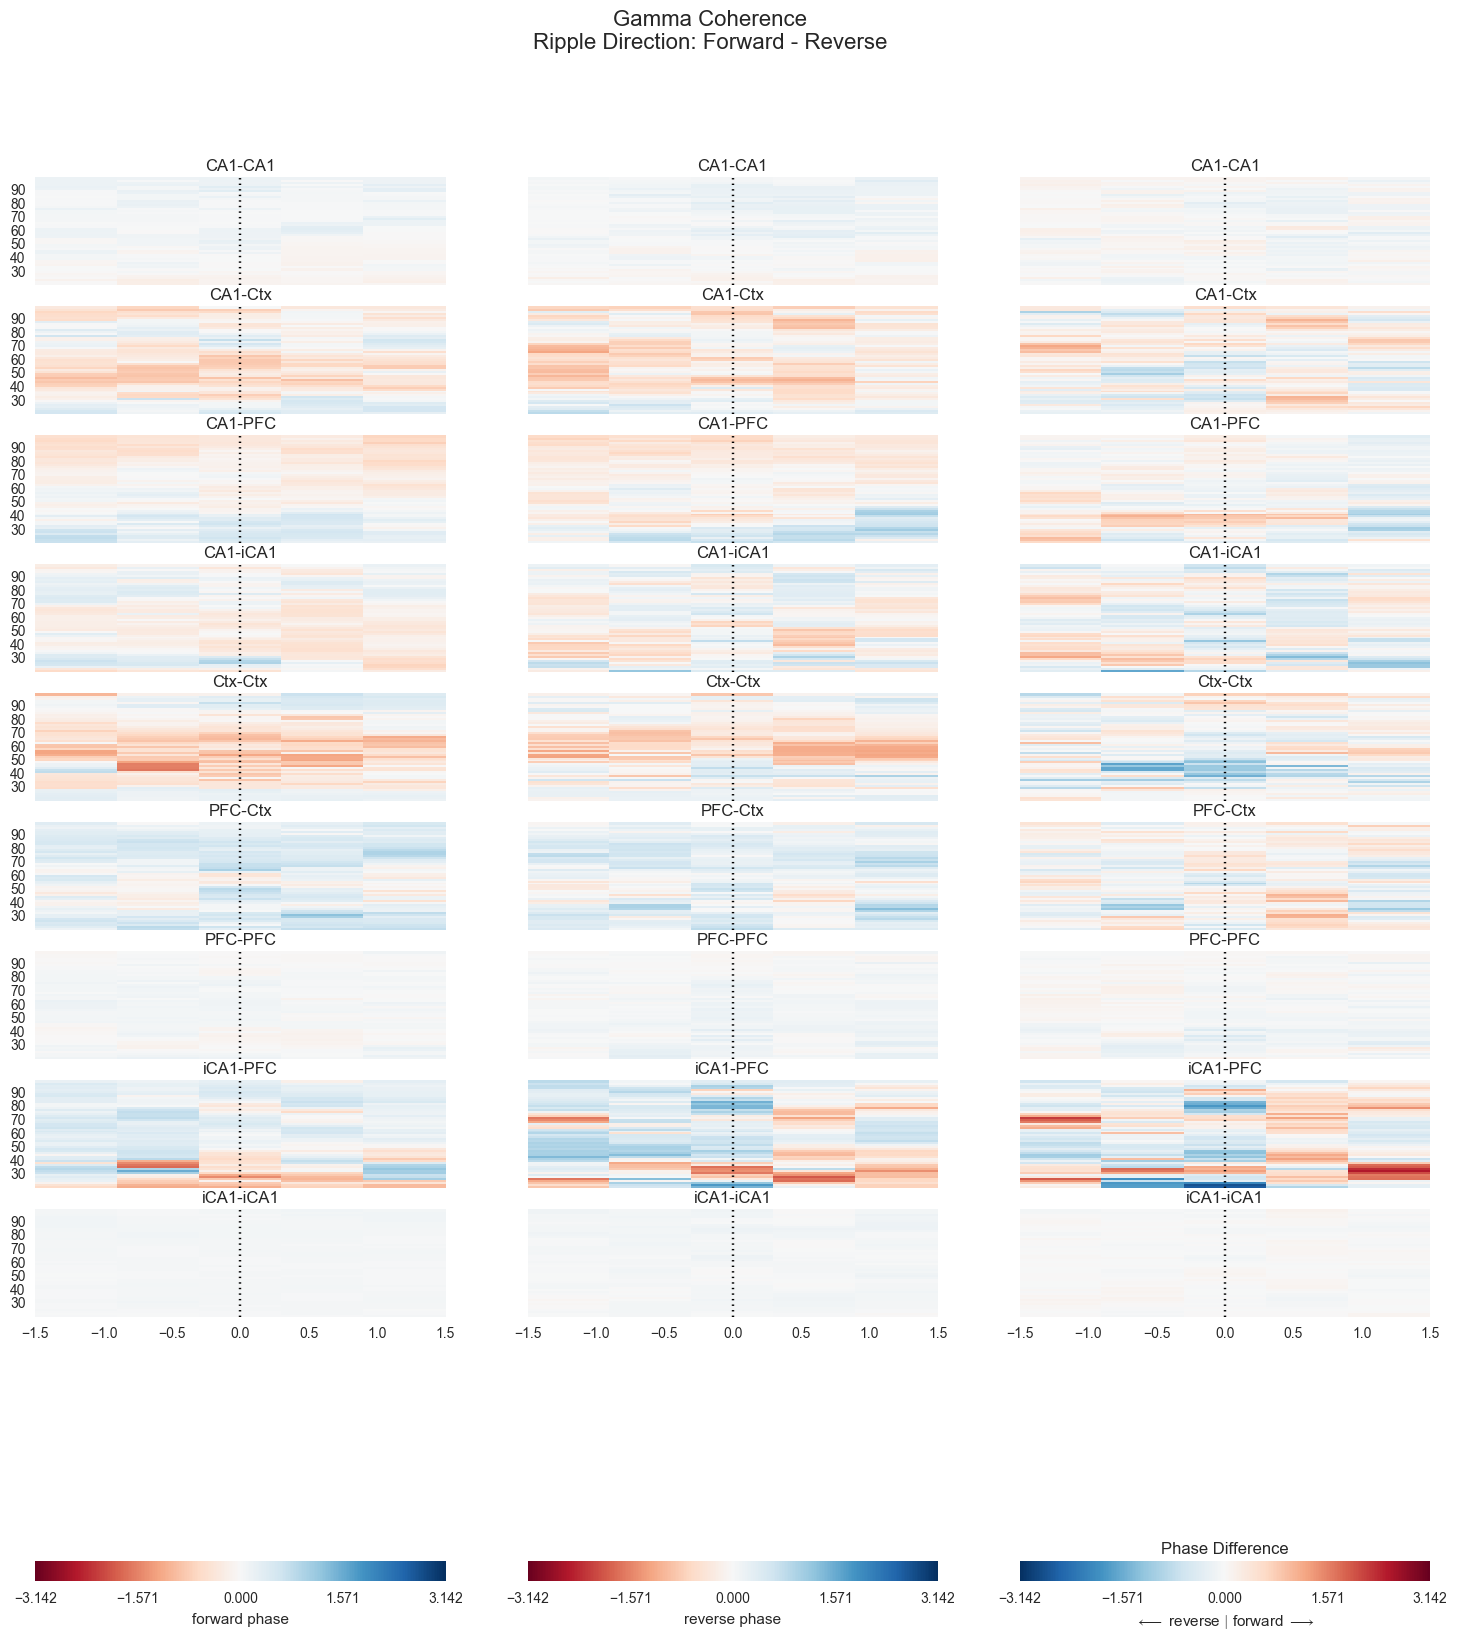

In [432]:
def plot_coherence_phase_difference(path, tetrode_pair_info, brain_area_pair_groups, figsize=(18, 21)):
    coherence_name, covariate, difference_level = path
    num_groups = len(brain_area_pair_groups)
    level2, level1 = difference_level.split('_')

    fig, axes = plt.subplots(num_groups, 3, figsize=figsize, sharex=True, sharey=True)
    
    # Level2
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_coherence = analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, level2).mean(axis=0)
        level2_mesh = spectral.plot_group_delayogram(group_coherence, axis_handle=axes[group_ind, 0],
                                                     vmin=-np.pi, vmax=np.pi)
        axes[group_ind, 0].set_title('-'.join(brain_area_pair))
        axes[group_ind, 0].axvline(0, color='black', linestyle=':')
        
    plt.colorbar(level2_mesh, ax=axes[:, 0].ravel().tolist(),
                 ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                 orientation='horizontal', label='{} phase'.format(level2))
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title()) 
    
    # Level1
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_coherence = analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, level1).mean(axis=0)
        level1_mesh = spectral.plot_group_delayogram(group_coherence, axis_handle=axes[group_ind, 1],
                                                     vmin=-np.pi, vmax=np.pi)
        axes[group_ind, 1].set_title('-'.join(brain_area_pair))
        axes[group_ind, 1].axvline(0, color='black', linestyle=':')
        
    plt.colorbar(level1_mesh, ax=axes[:, 1].ravel().tolist(),
                 ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                 orientation='horizontal', label='{} phase'.format(level1))
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title()) 
    
    ## Difference
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_coherence = analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, difference_level).mean(axis=0)
        mesh = spectral.plot_group_delayogram(group_coherence, axis_handle=axes[group_ind, 2],
                                              vmin=-np.pi, vmax=np.pi, cmap='RdBu_r')
        axes[group_ind, 2].set_title('-'.join(brain_area_pair))
        axes[group_ind, 2].axvline(0, color='black', linestyle=':')
        
    label = '$\longleftarrow$ {level1} $|$ {level2} $\longrightarrow$'.format(level2=level2, level1=level1)
    cb = plt.colorbar(mesh, ax=axes[:, 2].ravel().tolist(), ticks=[-np.pi, -np.pi/2, 0, np.pi/2, np.pi],
                 orientation='horizontal', label=label)
    cb.ax.set_title('Phase Difference')
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title())
    plt.suptitle(title, fontsize=16)
    

path = ('gamma_coherence', 'ripple_direction', 'forward_reverse')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_coherence_phase_difference(path, tetrode_pair_info, brain_area_pair_groups)

## Group Delay

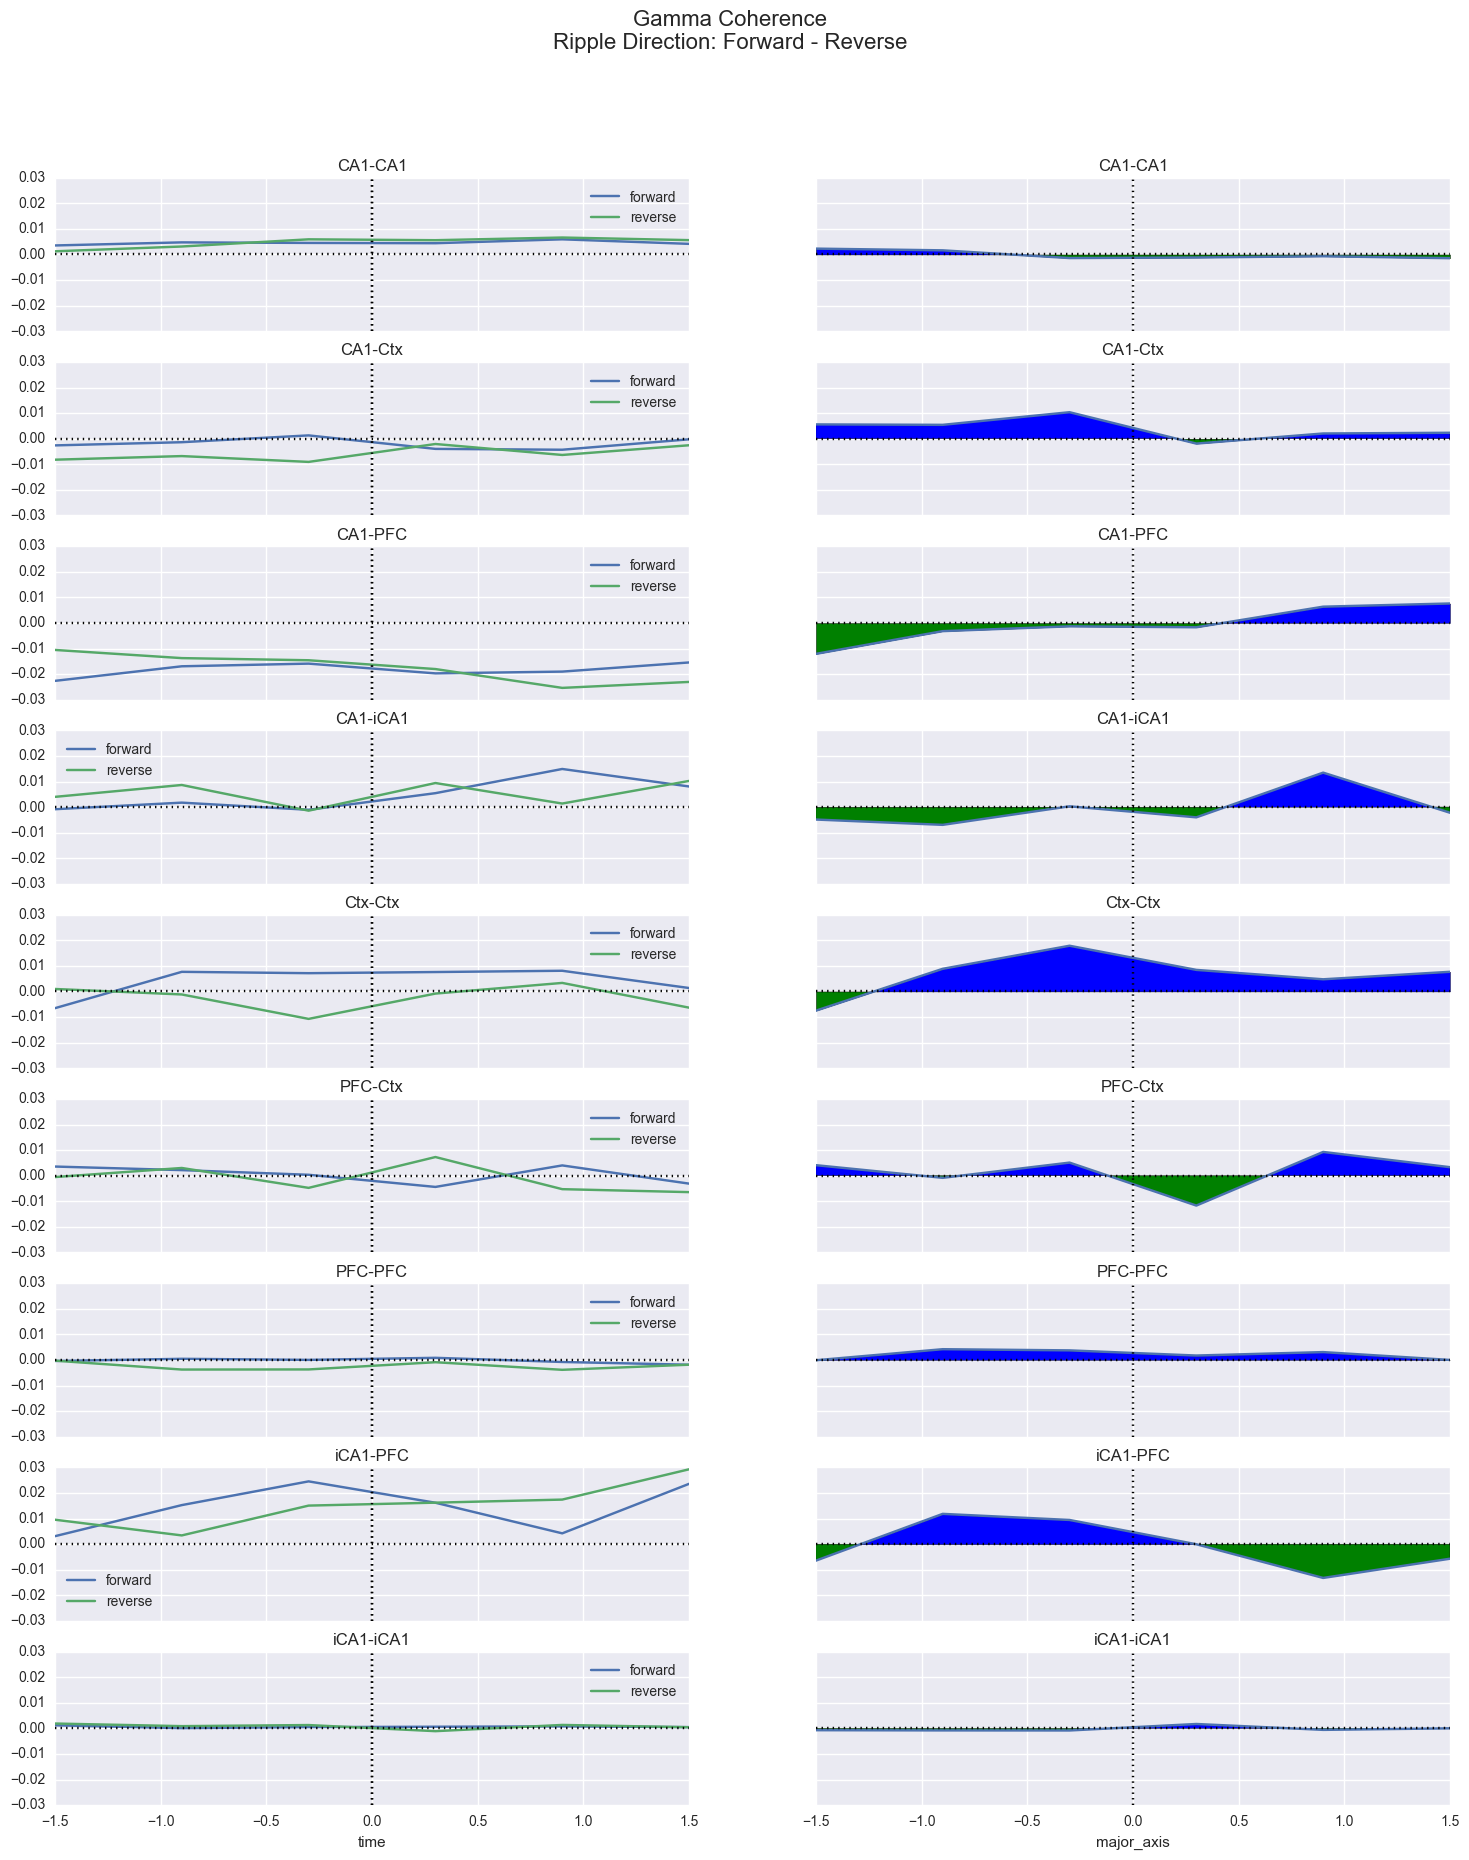

In [523]:
def plot_group_delay_difference(path, tetrode_pair_info, brain_area_pair_groups, figsize=(18, 21)):
    coherence_name, covariate, difference_level = path
    num_groups = len(brain_area_pair_groups)
    level2, level1 = difference_level.split('_')

    fig, axes = plt.subplots(num_groups, 2, figsize=figsize, sharex=True, sharey=True)
    
    # Level2
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_delay2 = (analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, level2)
                           .apply(spectral.group_delay_over_time, axis=(1,2)))
        group_delay2.mean(axis=0).plot(y='delay', ax=axes[group_ind, 0], label=level2)
        axes[group_ind, 0].set_title('-'.join(brain_area_pair))
        axes[group_ind, 0].axvline(0, color='black', linestyle=':')
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title()) 
    
    # Level1
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_delay1 = (analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, level1)
                           .apply(spectral.group_delay_over_time, axis=(1,2)))
        group_delay1.mean(axis=0).plot(y='delay', ax=axes[group_ind, 0], label=level1)
        axes[group_ind, 0].set_title('-'.join(brain_area_pair))
        axes[group_ind, 0].axvline(0, color='black', linestyle=':')
        axes[group_ind, 0].axhline(0, color='black', linestyle=':')
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title()) 
    
    ## Difference
    for group_ind, (brain_area_pair, cur_tetrode_pair_info) in enumerate(brain_area_pair_groups):
        group_delay2 = (analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, level2)
                       .apply(spectral.group_delay_over_time, axis=(1,2)))
        group_delay1 = (analysis.get_tetrode_pair_group_from_hdf(
            cur_tetrode_pair_info.index, coherence_name, covariate, level1)
                       .apply(spectral.group_delay_over_time, axis=(1,2)))
        diff_delay = ((group_delay2.to_xarray() - group_delay1.to_xarray())
                      .mean(axis=0)
                      .loc[:, 'delay'])
        diff_delay.plot(ax=axes[group_ind, 1])
        axes[group_ind, 1].fill_between(diff_delay.indexes['major_axis'].values, 0, diff_delay.values,
                                        where=diff_delay.values > 0, facecolor='blue', interpolate=True)
        axes[group_ind, 1].fill_between(diff_delay.indexes['major_axis'].values, 0, diff_delay.values,
                                        where=diff_delay.values < 0, facecolor='green', interpolate=True)
        
        axes[group_ind, 1].set_title('-'.join(brain_area_pair))
        axes[group_ind, 1].axvline(0, color='black', linestyle=':')
        axes[group_ind, 1].axhline(0, color='black', linestyle=':')
    
    title = '{}\n{}: {}'.format(coherence_name.replace('_', ' ').title(),
                        covariate.replace('_', ' ').title(),
                        level.replace('_', ' - ').title())
    plt.suptitle(title, fontsize=16)
    
path = ('gamma_coherence', 'ripple_direction', 'forward_reverse')
tetrode_pair_info = analysis.get_all_tetrode_pair_info(coherence_name)
brain_area_pair_groups = tetrode_pair_info.groupby(['area_1', 'area_2'])
plot_group_delay_difference(path, tetrode_pair_info, brain_area_pair_groups)